#  Game Winner Prediction - Pubg Dataset



##  **1.Introduction**

__PUBG__ stands for __Player's Unkown Battlegrounds__, which is a multiplayer game that is available on various platforms which are Windows, Android, IOS, etc. The game features different modes, the three different modes are Classic, Arcade, and EvoGround. In classic, the player will be provided with different maps that range from Erangel, Miramar, Sanhok, and Vikendi. In the arcade mode, there are War, Mini-Zone, Quick Match, and Sniper Training. There are 555 Million Players worldwide playing PUBG on all different platforms, with this huge number comes the ranking difficulty. The basic match of Battle Royal consists of 100 people playing a match with only 1 Winner (who can have Chicken Dinner). Ranking these players on basis of different attributes becomes difficult as there is a possibility of some players with more than one similar ranking. 

## **2.Problem Statement**

1.Prepare a complete data analysis report on the given data

2.Create a predictive model which is an attempt to predict the win probability of the Pubg match and to look at the important factors affecting the win probability of the pubg game. 

# Domain Analysis

__Id__ - Each player have a unique ID.

__groupId__ - Each group have a unique ID.

__matchId__ - Each match have a unique ID.

__assists__ - Number of enemy players this player damaged that were killed by teammates.

__boosts__ - Number of boost items used.

__damageDealt__ - Total damage dealt. Note: Self inflicted damage is subtracted.

__DBNOs__ - Number of enemy players knocked.

__headshotKills__ - Number of enemy players killed with headshots.

__heals__ - Number of healing items used.

__killPlace__ - Ranking in match of number of enemy players killed.

__killPoints__ - Kills-based external ranking of player. (Think of this as an Elo ranking where only kills matter.) If there is a value other than -1 in rankPoints, then any 0 in killPoints should be treated as a “None”.

__kills__ - Number of enemy players killed.

__killStreaks__ - Max number of enemy players killed in a short amount of time.

__longestKill__ - Longest distance between player and player killed at time of death. This may be misleading, as downing a player and driving away may lead to a large longestKill stat.

__matchDuration__ - Time taken to complete a single match.

__matchType__ - String identifying the game mode that the data comes from. The standard modes are “solo”, “duo”, “squad”, “solo-fpp”, duo-fpp”, and “squad-fpp”; other modes are from events or custom matches.

__maxPlace__ - Worst placement we have data for in the match. This may not match with numGroups, as sometimes the data skips over placements.

__rankPoints__ - Elo-like ranking of player. This ranking is inconsistent and is being deprecated in the API’s next version, so use with caution. Value of -1 takes place of “None”.

__revives__ - Number of times this player revived teammates.

__rideDistance__ - Total distance traveled in vehicles measured in meters.

__roadKills__ - Number of kills while in a vehicle.

__swimDistance__ - Total distance traveled by swimming measured in meters.

__teamKills__ - Number of times this player killed a teammate.

__vehicleDestroys__ - Number of vehicles destroyed.

__walkDistance__ - Total distance traveled on foot measured in meters.

__weaponsAcquired__ - Number of weapons picked up.

__winPoints__ - Win-based external ranking of player. (Think of this as an Elo ranking where only winning matters.) If there is a value other than -1 in rankPoints, then any 0 in winPoints should be treated as a “None”.

__winPlacePerc__ - The target of prediction. This is a percentile winning placement, where 1 corresponds to 1st place, and 0 corresponds to last place in the match. It is calculated off of maxPlace, not numGroups, so it is possible to have missing chunks in a match.

## Importing Necessary Libaray

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Loading the Data

In [2]:
data = pd.read_csv("D:\AI\pubg.csv")

In [3]:
pd.set_option('display.max_columns',None)

## Basic Check

In [4]:
data.shape

(4446966, 29)

In [5]:
data.head(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.000,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.900,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.000,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875
5,ff79c12f326506,289a6836a88d27,bac52627a12114,0,0,100.000,1,1,0,44,0,1,1,18.44,1395,squad-fpp,28,28,1418,0,0.0000,0,0.00,0,0,34.70,1,0,0.0370
6,95959be0e21ca3,2c485a1ad3d0f1,a8274e903927a2,0,0,0.000,0,0,0,96,1262,0,0,0.00,1316,squad-fpp,28,28,-1,0,0.0000,0,0.00,0,0,13.50,1,1497,0.0000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.00,6,1500,0.7368
8,1a68204ccf9891,47cfbb04e1b1a2,df014fbee741c6,0,0,51.600,0,0,0,64,0,0,0,0.00,1375,squad,28,27,1493,0,0.0000,0,0.00,0,0,799.90,4,0,0.3704
9,e5bb5a43587253,759bb6f7514fd2,3d3031c795305b,0,0,37.270,0,0,0,74,0,0,0,0.00,1930,squad,29,27,1349,0,0.0000,0,0.00,0,0,65.67,1,0,0.2143


In [6]:
data.tail(10)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
4446956,dae05e0d743059,3902915a7a1943,97b64a07c05761,1,0,151.90,0,0,1,77,0,0,0,0.00,1693,squad-fpp,29,28,1500,1,0.0,0,0.000,0,0,828.30,7,0,0.1071
4446957,2a4163ccbe0e3b,2689c981578849,eebc058a45ff13,0,1,100.00,0,0,0,32,0,1,1,12.02,1396,duo-fpp,49,49,1546,1,0.0,0,0.000,0,0,363.70,2,0,0.4583
4446958,837349af7e8a35,58bc4104935623,2001300d4f5787,0,0,0.00,0,0,0,92,0,0,0,0.00,1414,duo-fpp,48,44,1546,0,0.0,0,0.000,0,0,0.00,0,0,0.0000
4446959,d29bfa313ad766,ac3f1b4a56e5ad,2f3b1af94739b3,0,0,22.68,0,0,0,89,0,0,0,0.00,1456,solo-fpp,96,95,1787,0,0.0,0,0.000,0,0,40.25,1,0,0.0842
4446960,69fa4c2d5431b1,2a3ad0e37fb6ce,818ccf2160343f,0,0,327.70,3,2,0,4,0,4,3,90.25,1936,squad-fpp,30,28,1477,0,180.4,0,0.000,0,0,845.60,3,0,0.2414
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,squad-fpp,29,28,-1,0,1292.0,0,0.000,0,0,1019.00,3,1507,0.1786
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,solo,93,93,1501,0,0.0,0,0.000,0,0,81.70,6,0,0.2935
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,squad-fpp,28,28,1500,0,0.0,0,2.184,0,0,788.70,4,0,0.4815
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,squad-fpp,26,25,1418,2,0.0,0,0.000,0,0,2748.00,8,0,0.8000
4446965,0d8e7ed728b6fd,8c74f72fedf5ff,62a16aabcc095c,0,2,268.00,0,0,1,18,0,2,1,78.25,1766,solo-fpp,98,94,1590,0,1369.0,0,0.000,0,0,1244.00,5,0,0.5464


In [7]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               object 
 1   groupId          object 
 2   matchId          object 
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  matchDuration    int64  
 15  matchType        object 
 16  maxPlace         int64  
 17  numGroups        int64  
 18  rankPoints       int64  
 19  revives          int64  
 20  rideDistance     float64
 21  roadKills        int64  
 22  swimDistance     float64
 23  teamKills        int64  
 24  vehicleDestroys  int64  
 25  walkDistance     float64
 26  weaponsAcquired  int64  
 27  winPoints   

In [9]:
data.describe()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446966e+06,4.446965e+06
mean,2.338149e-01,1.106908e+00,1.307171e+02,6.578755e-01,2.268196e-01,1.370147e+00,4.759935e+01,5.050060e+02,9.247833e-01,5.439551e-01,2.299759e+01,1.579506e+03,4.450467e+01,4.300759e+01,8.920105e+02,1.646590e-01,6.061157e+02,3.496091e-03,4.509322e+00,2.386841e-02,7.918208e-03,1.154218e+03,3.660488e+00,6.064601e+02,4.728216e-01
std,5.885731e-01,1.715794e+00,1.707806e+02,1.145743e+00,6.021553e-01,2.679982e+00,2.746294e+01,6.275049e+02,1.558445e+00,7.109721e-01,5.097262e+01,2.587399e+02,2.382811e+01,2.328949e+01,7.366478e+02,4.721671e-01,1.498344e+03,7.337297e-02,3.050220e+01,1.673935e-01,9.261157e-02,1.183497e+03,2.456544e+00,7.397004e+02,3.074050e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,1.000000e+00,1.000000e+00,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.367000e+03,2.800000e+01,2.700000e+01,-1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.551000e+02,2.000000e+00,0.000000e+00,2.000000e-01
50%,0.000000e+00,0.000000e+00,8.424000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.438000e+03,3.000000e+01,3.000000e+01,1.443000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.856000e+02,3.000000e+00,0.000000e+00,4.583000e-01
75%,0.000000e+00,2.000000e+00,1.860000e+02,1.000000e+00,0.000000e+00,2.000000e+00,7.100000e+01,1.172000e+03,1.000000e+00,1.000000e+00,2.132000e+01,1.851000e+03,4.900000e+01,4.700000e+01,1.500000e+03,0.000000e+00,1.909750e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.976000e+03,5.000000e+00,1.495000e+03,7.407000e-01
max,2.200000e+01,3.300000e+01,6.616000e+03,5.300000e+01,6.400000e+01,8.000000e+01,1.010000e+02,2.170000e+03,7.200000e+01,2.000000e+01,1.094000e+03,2.237000e+03,1.000000e+02,1.000000e+02,5.910000e+03,3.900000e+01,4.071000e+04,1.800000e+01,3.823000e+03,1.200000e+01,5.000000e+00,2.578000e+04,2.360000e+02,2.013000e+03,1.000000e+00


## Reducing the Memory Size of Dataset

The size of the PUBG dataset is pretty big for a lower/mid-range laptops so here's a script to make the dataset smaller without losing information.

It uses the following approach:
- Iterate over every column
- Determine if the column is numeric
- determine if the column can be represented by an integer
-find the min and the max value
- Determine and apply the smallest datatype that can fit the the range of values

This reduces the dataset.

In [10]:
# memory saving function 
def reduce_memory_usage(data):
  """Iterate through all the columns of a dataframe and modify the data type
     to reduce memory usage.
     
 """
  start_mem = data.memory_usage().sum()/1024**2
  for col in data.columns:
    col_type = data[col].dtype

    if col_type != object:
      c_min = data[col].min()
      c_max = data[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          data[col] = data[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          data[col] = data[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          data[col] = data[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          data[col] = data[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          data[col] = data[col].astype(np.float32)
        else:
          data[col] = data[col].astype(np.float64)

  end_mem = data.memory_usage().sum()/1024**2
  print("Memory Usage of Dataframe is {:.2f} MB --> Reduced to --> {:.2f} MB (Decreased by {:.1f}%)".format(start_mem ,end_mem , 100*(start_mem - end_mem)/start_mem))
  
    




 Checking Missing or Null Values in Data 

In [11]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

As there is one Null value Present in Target Variable Column(winPlacePerc) so we will remove that Row

In [12]:
data[data['winPlacePerc'].isnull()==True]

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
2744604,f70c74418bb064,12dfbede33f92b,224a123c53e008,0,0,0.0,0,0,0,1,0,0,0,0.0,9,solo-fpp,1,1,1574,0,0.0,0,0.0,0,0,0.0,0,0,NaN


In [13]:
data.drop(labels=2744604,inplace=True)

In [14]:
data.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

There are no Missing or Null values in Dataset

Now we will check if any Duplicate values are in Dataset

In [15]:
data.duplicated().sum()

0

There is no Duplicate Values in Dataset

# Exploratory Data Analysis


## Univariate Analysis


In [16]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

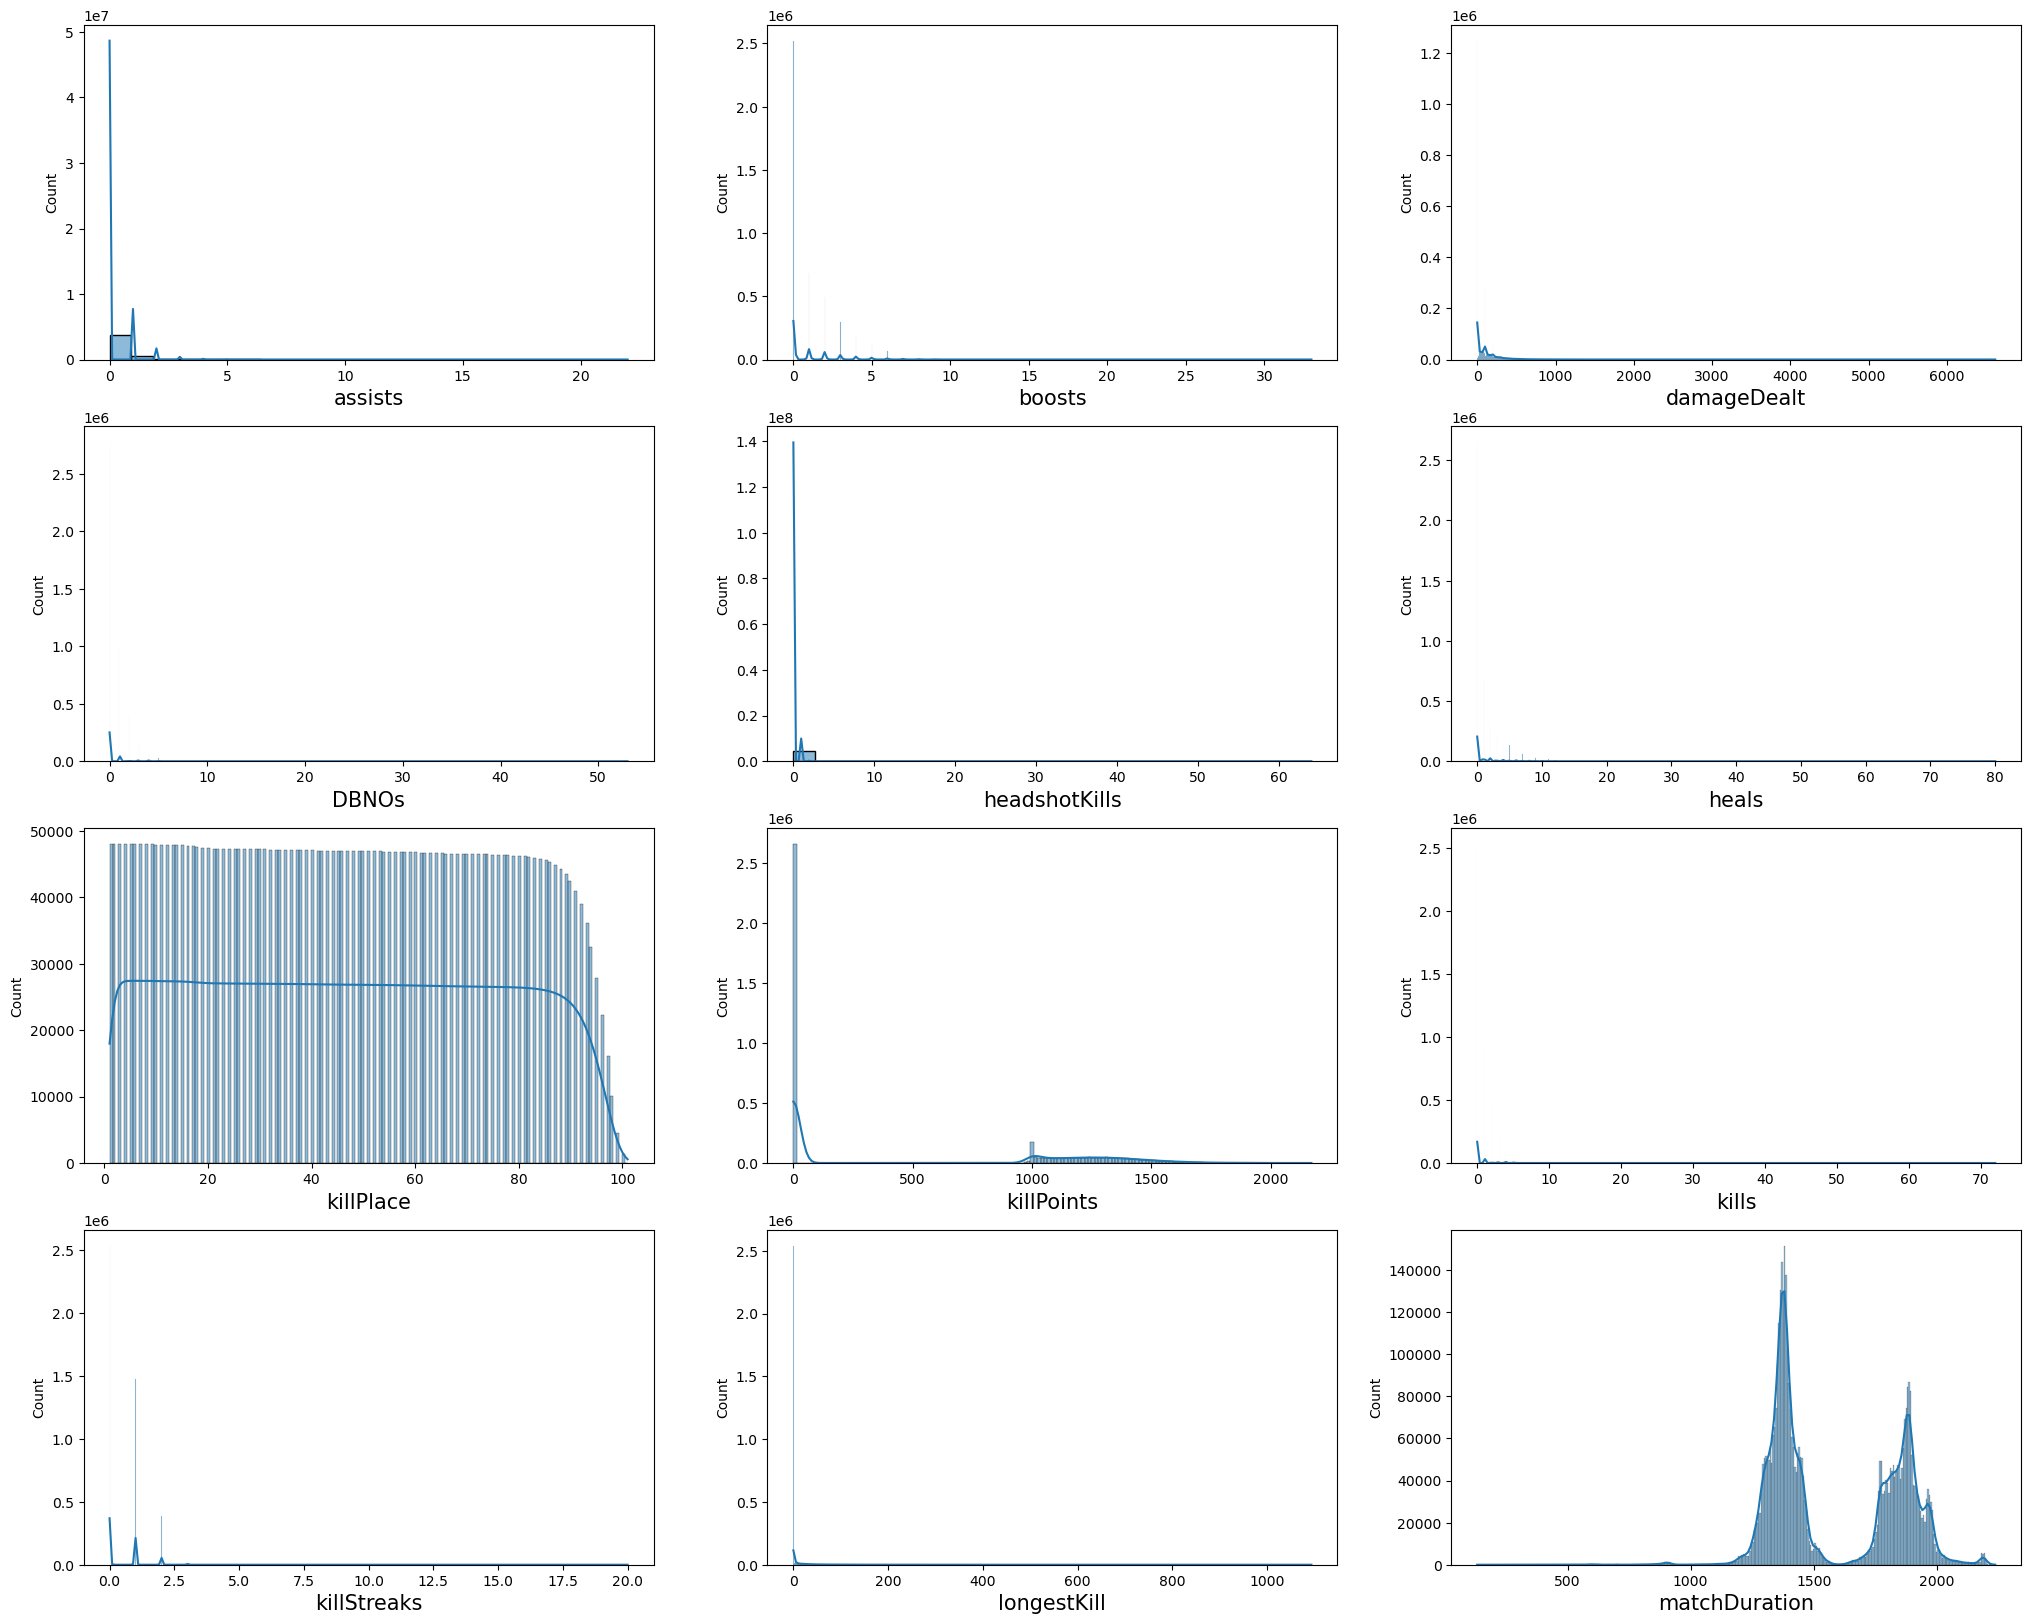

In [17]:
plt.figure(figsize=(25,20))
plotnumber = 1

for column in data.columns[3:15]:

  if plotnumber<=12:
    ax = plt.subplot(4,3,plotnumber)
    sns.histplot(x=column,data=data,kde=True,)
    plt.xlabel(column,fontsize=15)

  plotnumber+=1

<AxesSubplot:>

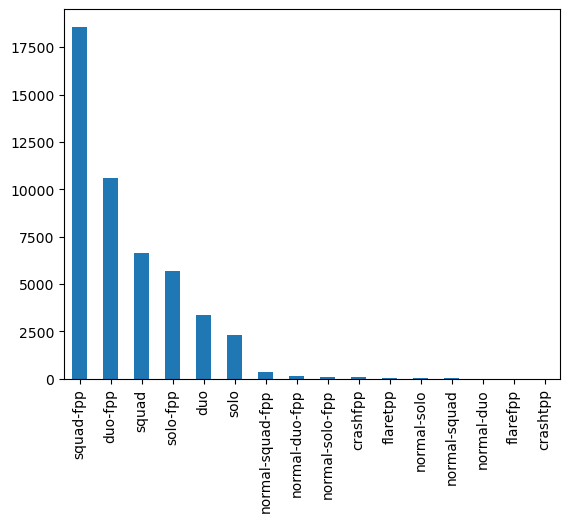

In [18]:
data.groupby('matchId')['matchType'].first().value_counts().plot.bar()

Text(0.5, 1.0, 'Kill Count')

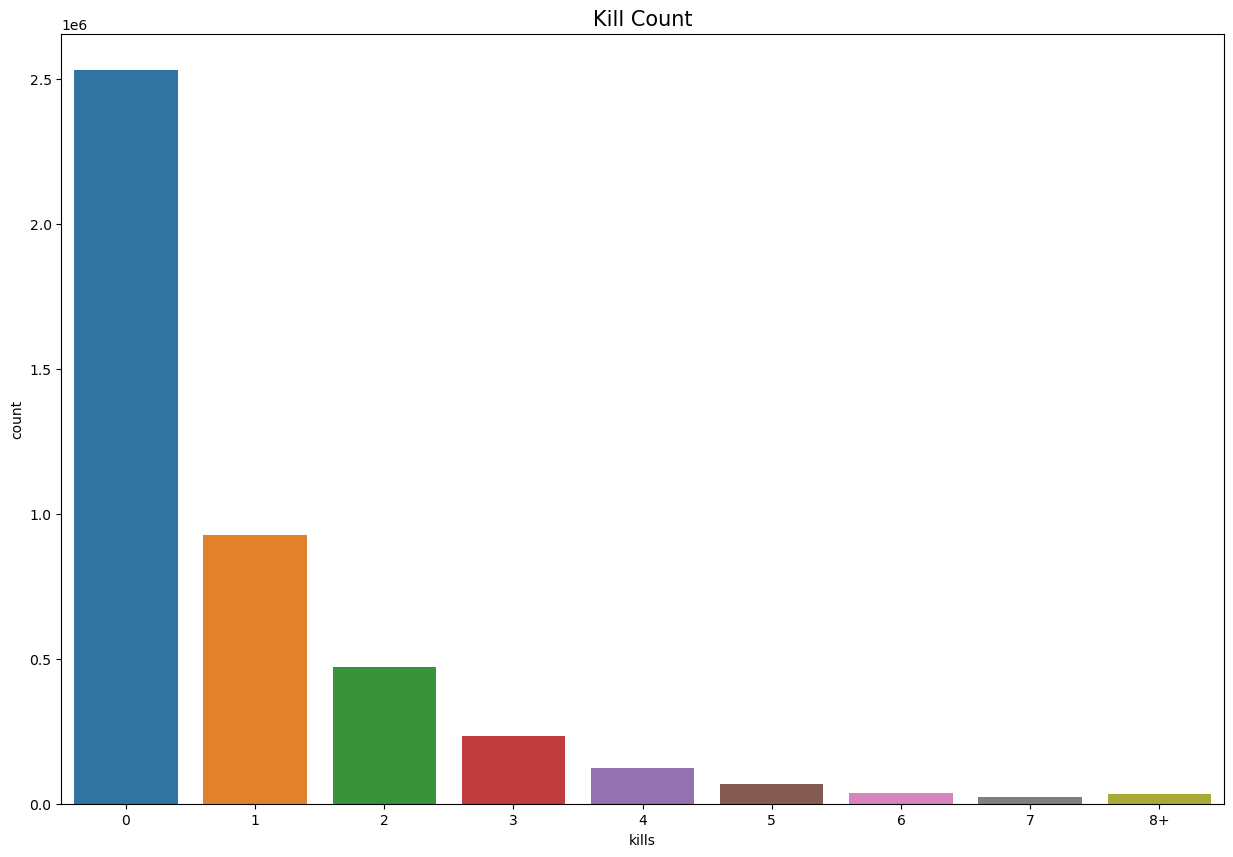

In [19]:
data1 = data.copy()
data1.loc[data1['kills'] > data1['kills'].quantile(0.99)] = '8+'
plt.figure(figsize=(15,10))
sns.countplot(data1['kills'].astype('str').sort_values())
plt.title("Kill Count",fontsize=15)

Maximum players having zero kills ,

 we are going to check for those players that dealed with some damage or not.

<AxesSubplot:title={'center':'Damage Dealt by 0 killers'}, xlabel='damageDealt', ylabel='Density'>

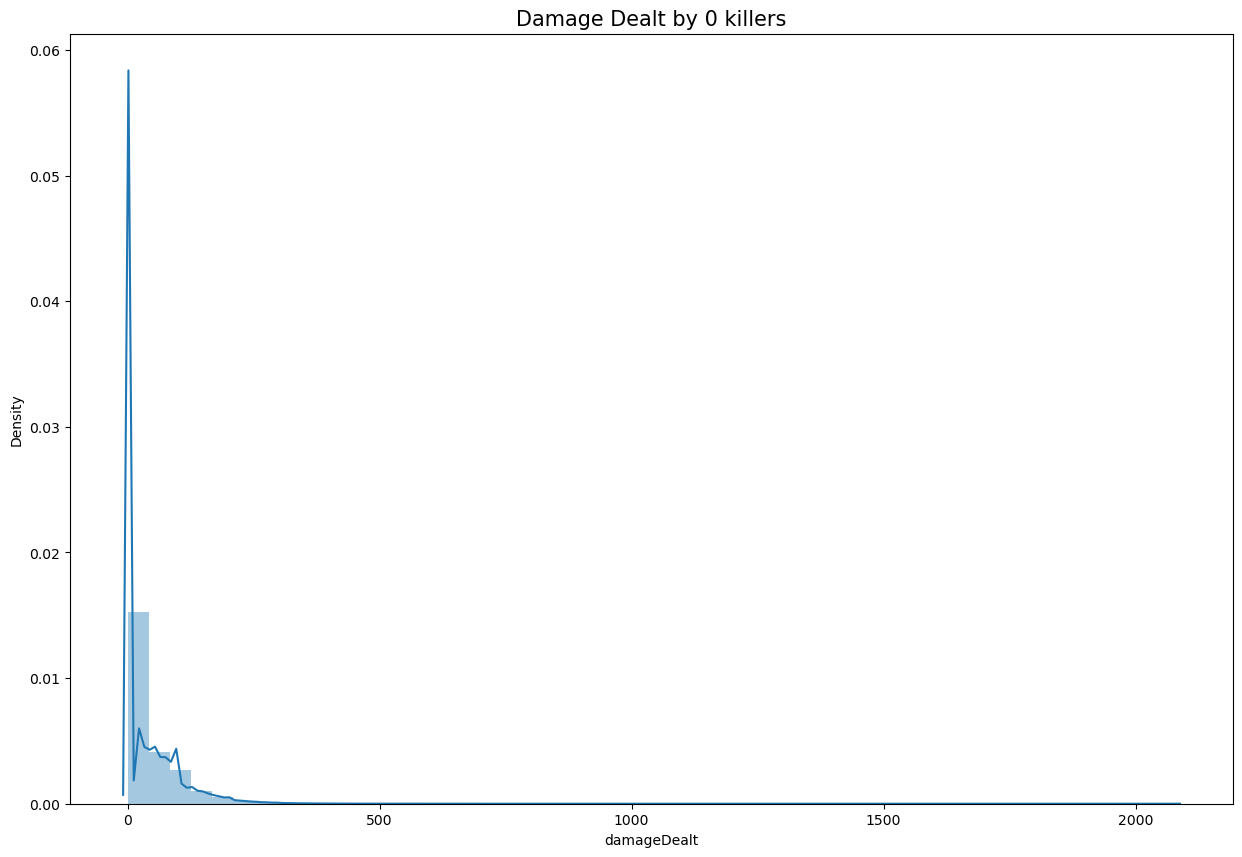

In [20]:
df = data.copy()
df = df[data['kills']==0]
plt.figure(figsize=(15,10))
plt.title("Damage Dealt by 0 killers",fontsize=15)
sns.distplot(df['damageDealt'])

## Bivariate Analysis 

<AxesSubplot:xlabel='winPlacePerc', ylabel='kills'>

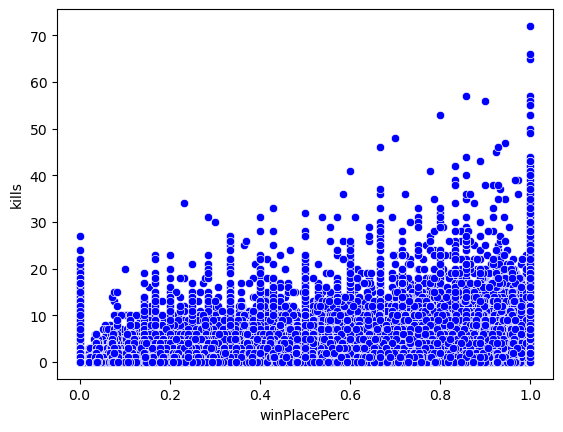

In [21]:
sns.scatterplot(x="winPlacePerc", y="kills", color="b", data=data)

<AxesSubplot:xlabel='killsCategories', ylabel='winPlacePerc'>

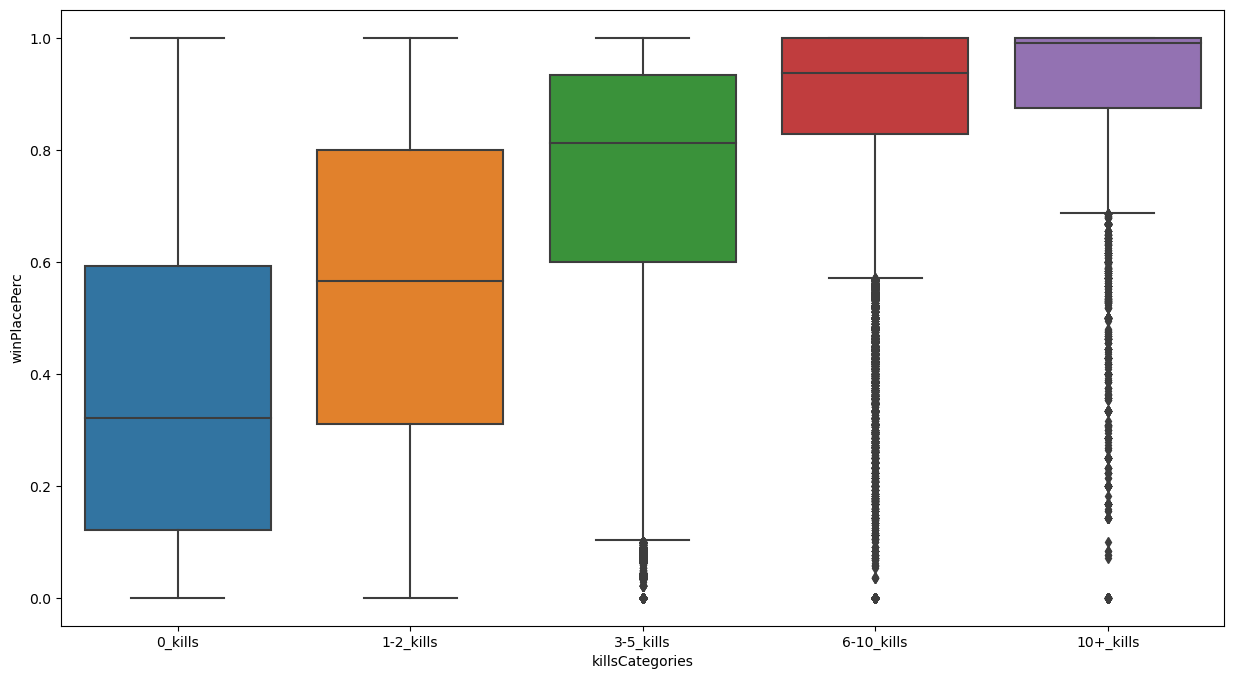

In [22]:
kills = data.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1, 0, 2, 5, 10, 60], labels=['0_kills','1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])

plt.figure(figsize=(15,8))
sns.boxplot(x="killsCategories", y="winPlacePerc", data=kills)

In [23]:
print("The average person walks for {:.1f}m, 99% of people have walked {}m or less, while the player keeps running ,walked for {}m.".format(data['walkDistance'].mean(), data['walkDistance'].quantile(0.99), data['walkDistance'].max()))

The average person walks for 1154.2m, 99% of people have walked 4396.0m or less, while the player keeps running ,walked for 25780.0m.


<AxesSubplot:title={'center':'Walking Distance Distribution'}, xlabel='walkDistance', ylabel='Density'>

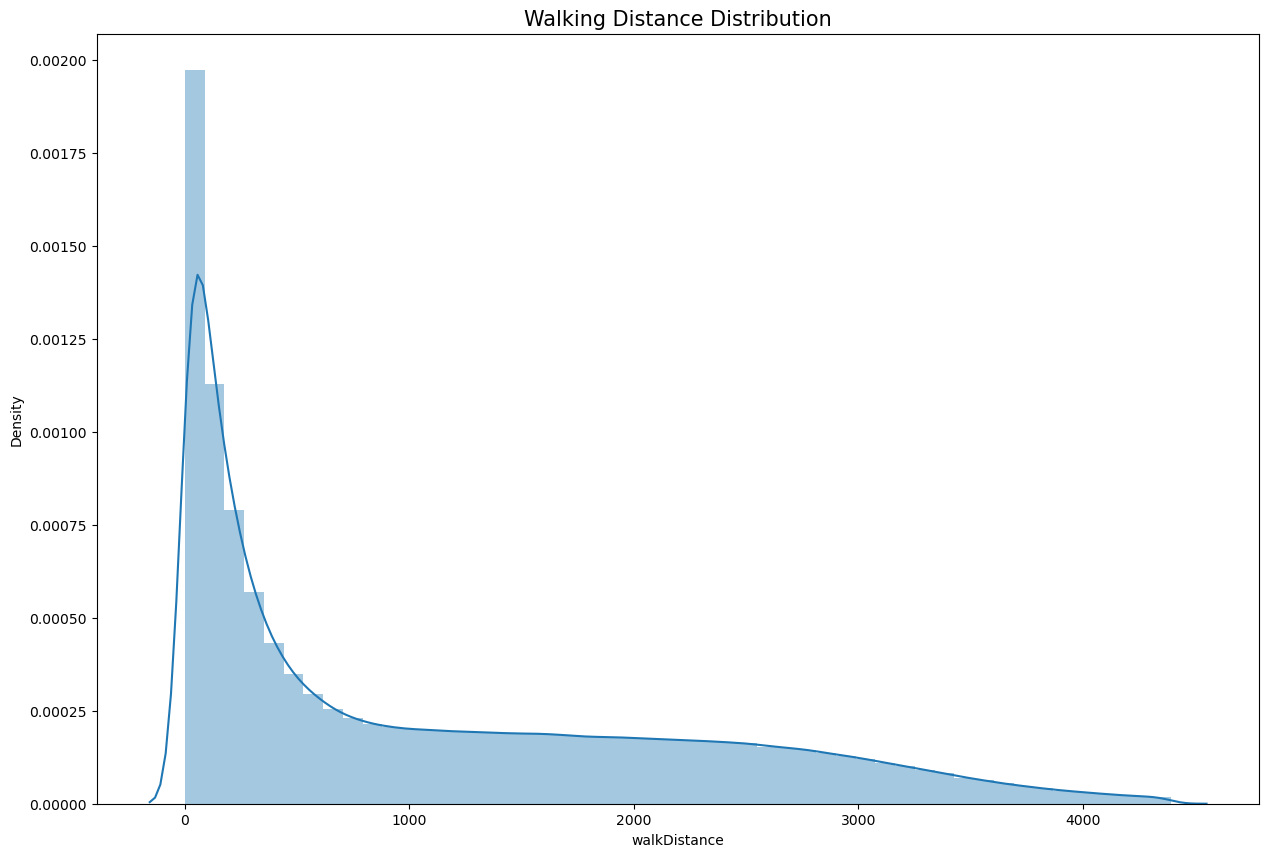

In [24]:
data1 = data.copy()
data1 = data1[data1['walkDistance'] < data1['walkDistance'].quantile(0.99)]
plt.figure(figsize=(15,10))
plt.title("Walking Distance Distribution",fontsize=15)
sns.distplot(data1['walkDistance'])

In [25]:
print("{} players ({:.4f}%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).".format(len(data[data['walkDistance'] == 0]), 100*len(data1[data1['walkDistance']==0])/len(data)))

99602 players (2.2398%) walked 0 meters. This means that they die before even taking a step or they are afk (more possible).


<AxesSubplot:xlabel='winPlacePerc', ylabel='walkDistance'>

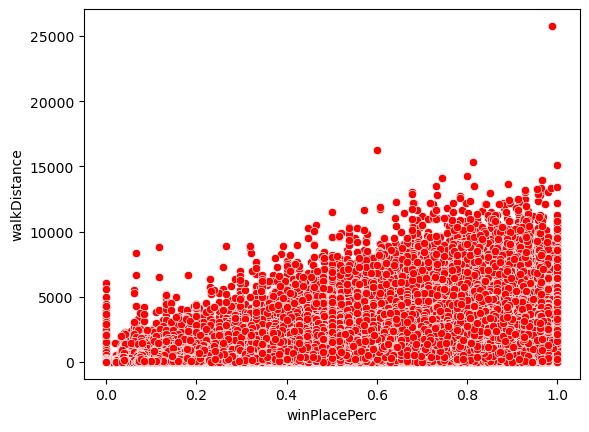

In [26]:
sns.scatterplot(x="winPlacePerc", y="walkDistance",  data=data, color="red")

In [27]:
print("The average person drives for {:.1f}m, 99% of people have drived {}m or less, while the formula 1 champion drived for {}m.".format(data1['rideDistance'].mean(), data1['rideDistance'].quantile(0.99), data1['rideDistance'].max()))

The average person drives for 601.5m, 99% of people have drived 6970.0m or less, while the formula 1 champion drived for 40710.0m.


<AxesSubplot:xlabel='winPlacePerc', ylabel='rideDistance'>

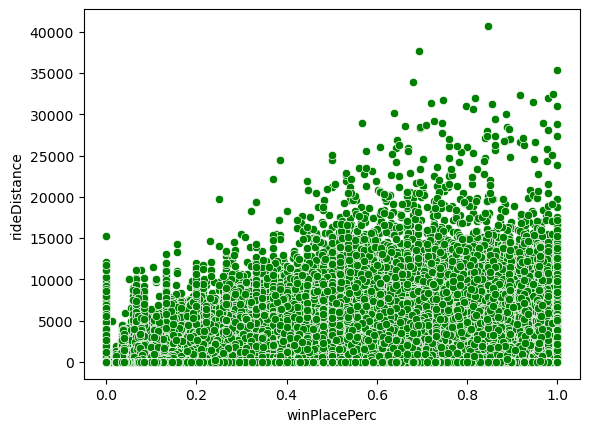

In [28]:
sns.scatterplot(x="winPlacePerc", y="rideDistance", data=data,color="green")

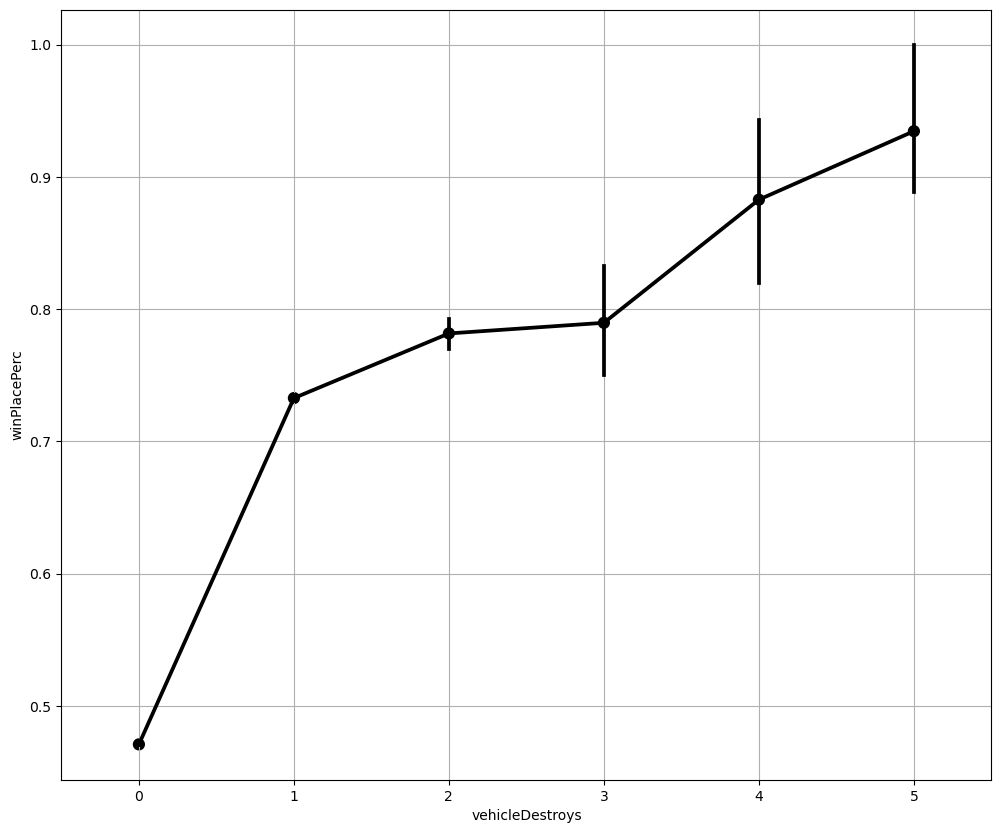

In [29]:
plt.figure(figsize=(12,10))
sns.pointplot(x='vehicleDestroys',y='winPlacePerc',data=data,color='black',alpha=0.8)
plt.grid()

In [30]:
print("The average person uses {:.1f} heal items, 99% of people use {} or less, while the doctor used {}.".format(data['heals'].mean(), data['heals'].quantile(0.99), data['heals'].max()))
print("The average person uses {:.1f} boost items, 99% of people use {} or less, while the doctor used {}.".format(data['boosts'].mean(), data['boosts'].quantile(0.99), data['boosts'].max()))

The average person uses 1.4 heal items, 99% of people use 12.0 or less, while the doctor used 80.
The average person uses 1.1 boost items, 99% of people use 7.0 or less, while the doctor used 33.


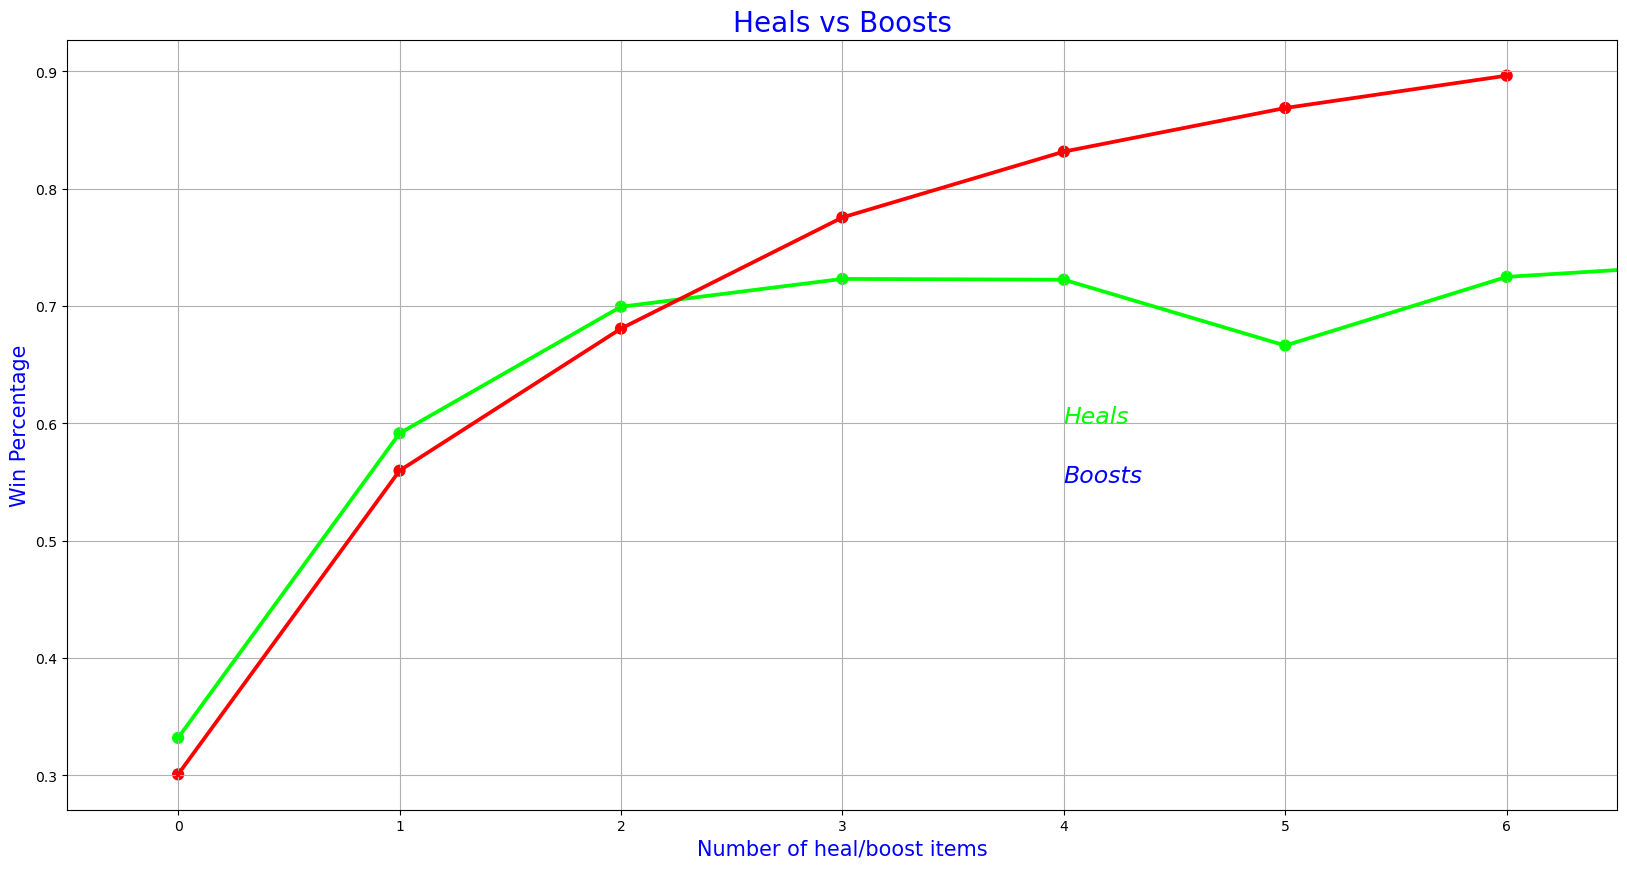

In [31]:
data1 = data.copy()
data1 = data1[data1['heals'] < data1['heals'].quantile(0.99)]
data1 = data1[data1['boosts'] < data1['boosts'].quantile(0.99)]

plt.figure(figsize =(20,10))
sns.pointplot(x='heals',y='winPlacePerc',data=data1,color='lime',alpha=0.8)
sns.pointplot(x='boosts',y='winPlacePerc',data=data1,color='red',alpha=0.8)
plt.text(4,0.6,'Heals',color='lime',fontsize = 17,style = 'italic')
plt.text(4,0.55,'Boosts',color='blue',fontsize = 17,style = 'italic')
plt.xlabel('Number of heal/boost items',fontsize = 15,color='blue')
plt.ylabel('Win Percentage',fontsize = 15,color='blue')
plt.title('Heals vs Boosts',fontsize = 20,color='blue')
plt.grid()

<AxesSubplot:xlabel='winPlacePerc', ylabel='heals'>

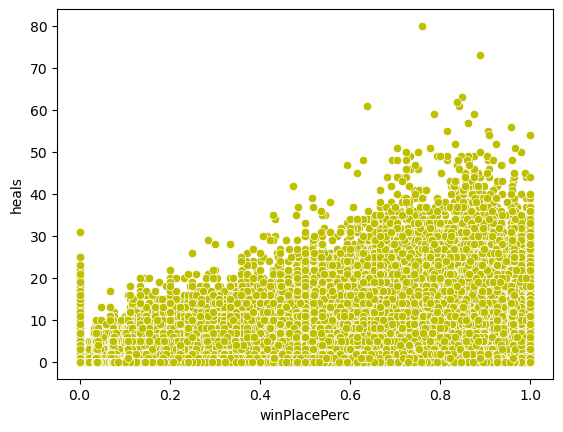

In [32]:
sns.scatterplot(x="winPlacePerc", y="heals", data=data, color="y")

<AxesSubplot:xlabel='winPlacePerc', ylabel='boosts'>

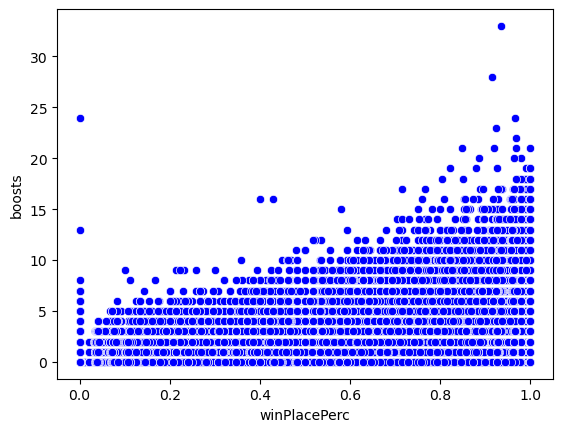

In [33]:
sns.scatterplot(x="winPlacePerc", y="boosts", data=data, color="blue")

In [34]:
data.corr()

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,1.000000,0.307683,0.406726,0.301057,0.198289,0.228556,-0.290062,0.039066,0.319690,0.243471,0.261425,-0.019450,-0.147916,-0.146805,-0.016407,0.198320,0.110644,0.011903,0.023372,0.006081,0.057921,0.290305,0.243882,0.024014,0.299441
boosts,0.307683,1.000000,0.521947,0.358907,0.334661,0.535854,-0.554844,0.008347,0.502024,0.405327,0.423290,0.072107,-0.013686,-0.012929,0.023202,0.253125,0.328855,0.035124,0.107993,0.013068,0.087387,0.640150,0.406609,-0.007645,0.634234
damageDealt,0.406726,0.521947,1.000000,0.735763,0.613409,0.342987,-0.677398,0.049904,0.888783,0.703599,0.563837,-0.006756,-0.040708,-0.040079,-0.001459,0.256951,0.140883,0.052487,0.036729,0.015468,0.081182,0.398199,0.353248,0.017762,0.440507
DBNOs,0.301057,0.358907,0.735763,1.000000,0.469923,0.265485,-0.555290,0.042616,0.707848,0.646872,0.451422,-0.014486,-0.267710,-0.265789,-0.003451,0.300999,0.102537,0.036093,0.017320,0.069430,0.060210,0.284660,0.218161,0.011108,0.279970
headshotKills,0.198289,0.334661,0.613409,0.469923,1.000000,0.199917,-0.469829,0.023988,0.674275,0.512882,0.447261,-0.017657,0.009211,0.009389,0.005119,0.150145,0.076495,0.013369,0.028531,0.008658,0.039200,0.250982,0.217552,0.004982,0.277722
heals,0.228556,0.535854,0.342987,0.265485,0.199917,1.000000,-0.386032,-0.002585,0.311781,0.270412,0.263278,0.108901,-0.064759,-0.064204,0.019142,0.236680,0.297484,0.024619,0.079587,0.035386,0.062870,0.430266,0.309071,-0.010990,0.427857
killPlace,-0.290062,-0.554844,-0.677398,-0.555290,-0.469829,-0.386032,1.000000,-0.023278,-0.730499,-0.810517,-0.541146,-0.005806,0.016791,0.018786,-0.014805,-0.269804,-0.236202,-0.057356,-0.089396,-0.037797,-0.073569,-0.590236,-0.490144,-0.002415,-0.719069
killPoints,0.039066,0.008347,0.049904,0.042616,0.023988,-0.002585,-0.023278,1.000000,0.036192,0.037091,0.014084,-0.099542,-0.044802,-0.042367,-0.975555,0.012041,-0.029316,-0.004156,-0.004604,-0.039739,-0.009658,0.004630,-0.003978,0.983417,0.012908
kills,0.319690,0.502024,0.888783,0.707848,0.674275,0.311781,-0.730499,0.036192,1.000000,0.802500,0.602936,-0.030688,-0.004847,-0.004060,0.008200,0.253323,0.114750,0.063651,0.039127,0.017601,0.079991,0.374774,0.336414,0.006929,0.419916
killStreaks,0.243471,0.405327,0.703599,0.646872,0.512882,0.270412,-0.810517,0.037091,0.802500,1.000000,0.515097,-0.034645,-0.037339,-0.036054,0.003426,0.241695,0.098420,0.065575,0.034588,0.027612,0.064374,0.327639,0.275373,0.008552,0.377566


## Multivariate Analysis

<AxesSubplot:>

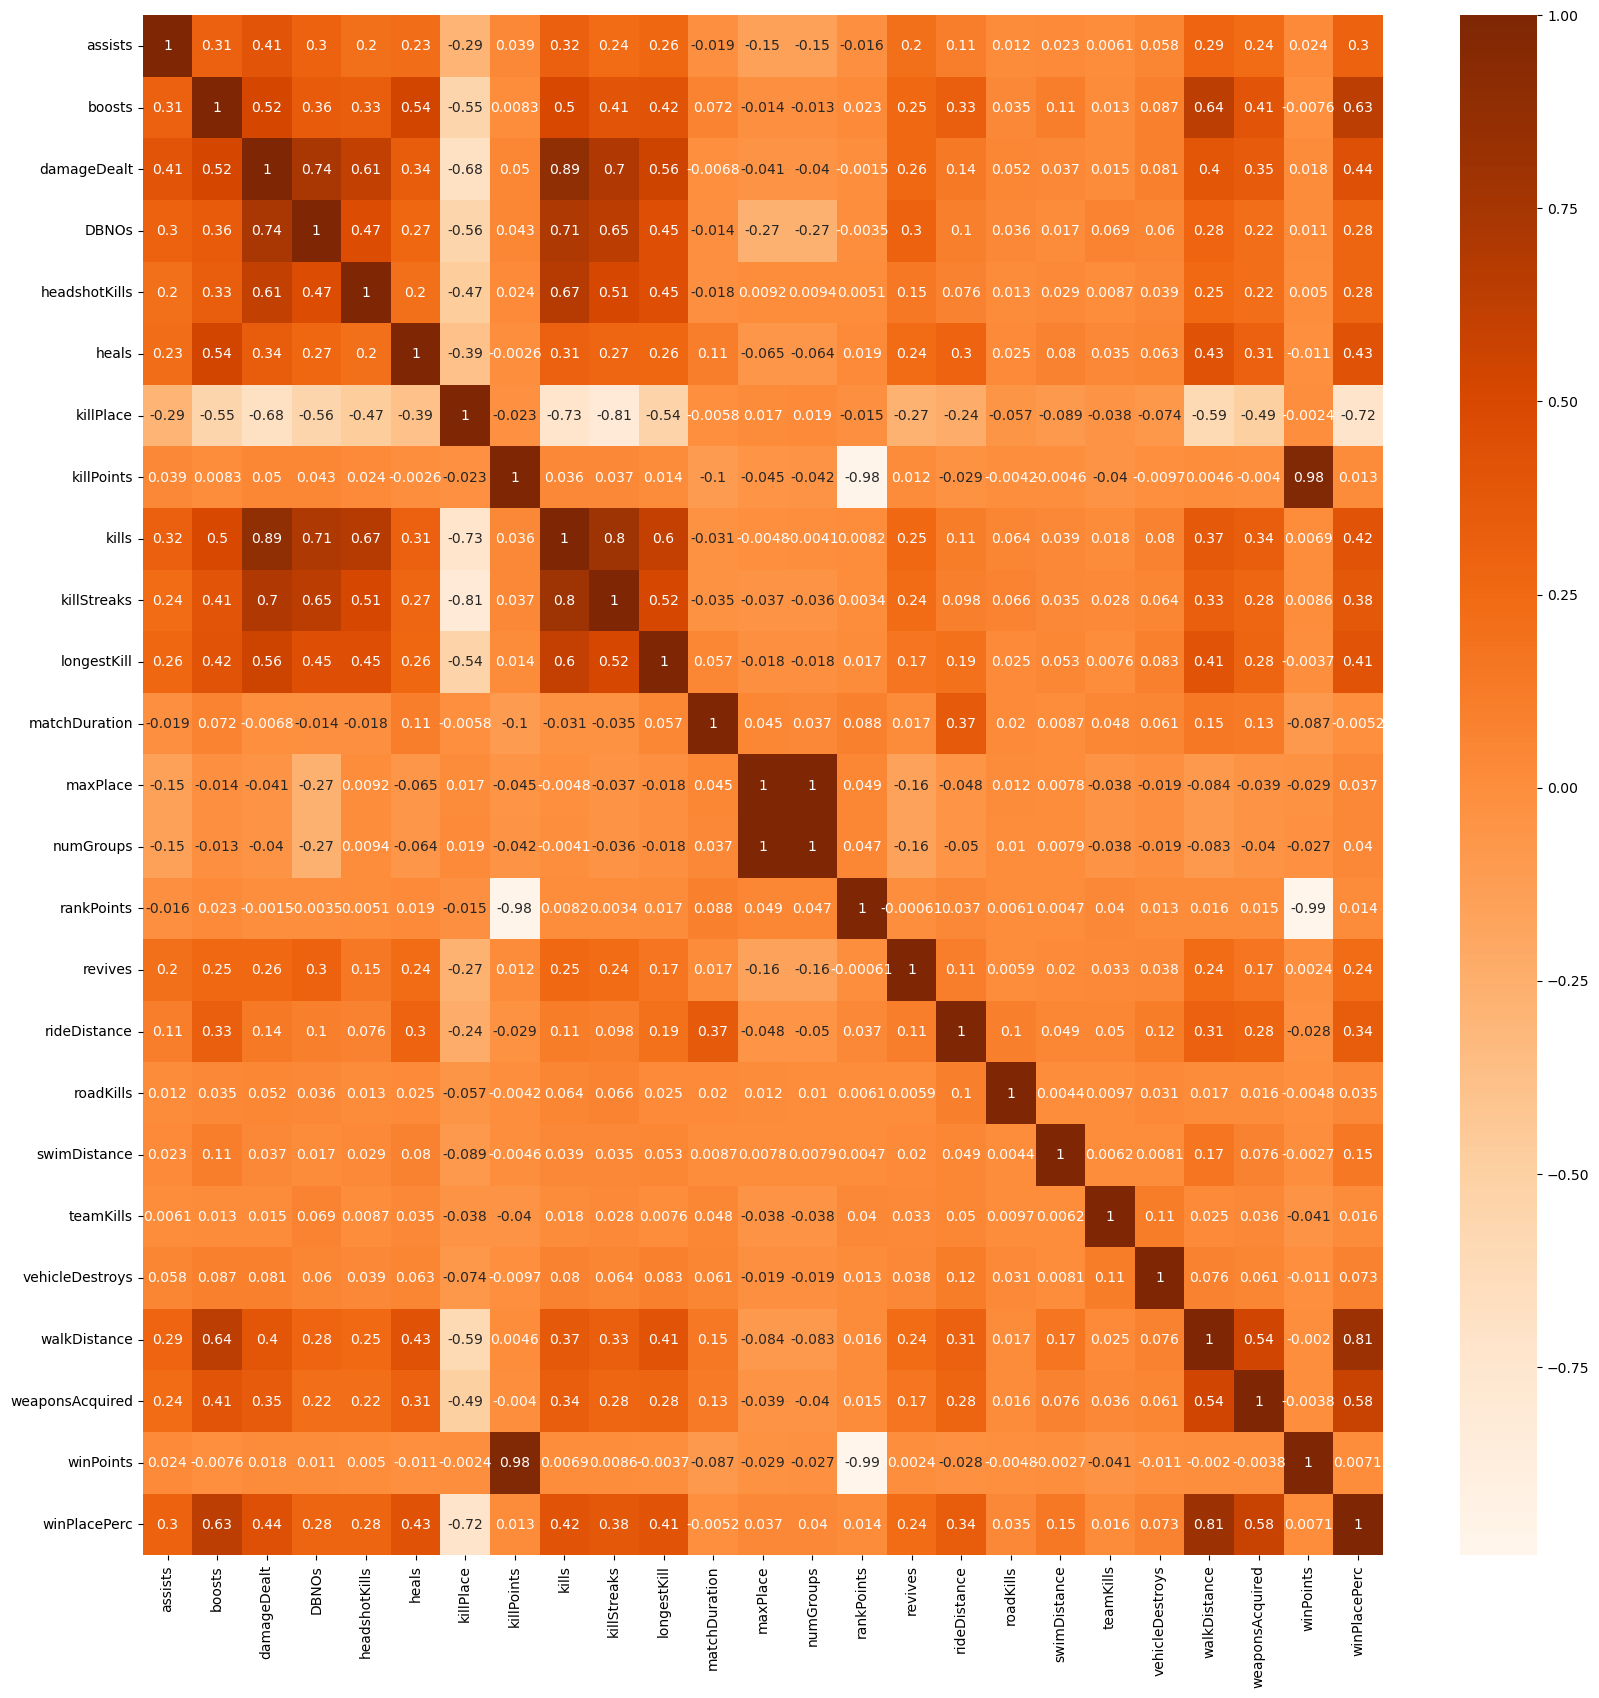

In [35]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot=True, data=data,cmap='Oranges')

# Data Preprocessing

In [36]:
data.columns

Index(['Id', 'groupId', 'matchId', 'assists', 'boosts', 'damageDealt', 'DBNOs',
       'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills',
       'killStreaks', 'longestKill', 'matchDuration', 'matchType', 'maxPlace',
       'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills',
       'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance',
       'weaponsAcquired', 'winPoints', 'winPlacePerc'],
      dtype='object')

## Encoding Categorical variables into Numerical Variable 

In [37]:
data1 = pd.get_dummies(data,columns=['matchType'],drop_first=True)

In [38]:
data1

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0.4444,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0.6400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0.7755,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0.1667,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0.1875,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,afff7f652dbc10,d238e426f50de7,18492834ce5635,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0.1786,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446962,f4197cf374e6c0,408cdb5c46b2ac,ee854b837376d9,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0.2935,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4446963,e1948b1295c88a,e26ac84bdf7cef,6d0cd12784f1ab,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0.4815,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446964,cc032cdd73b7ac,c2223f35411394,c9c701d0ad758a,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0.8000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Splitting into independent and dependent features.

In [39]:
X = data1.drop(columns=['Id', 'groupId', 'matchId','winPlacePerc'])

In [40]:
y= data1['winPlacePerc']

# Splitting into train_test_split

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [43]:
X

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,28,26,-1,0,0.0000,0,0.000,0,0,244.80,1,1466,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,26,25,1484,0,0.0045,0,11.040,0,0,1434.00,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,50,47,1491,0,0.0000,0,0.000,0,0,161.80,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,31,30,1408,0,0.0000,0,0.000,0,0,202.70,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,97,95,1560,0,0.0000,0,0.000,0,0,49.75,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4446961,0,0,0.00,0,0,0,74,1029,0,0,0.00,1873,29,28,-1,0,1292.0000,0,0.000,0,0,1019.00,3,1507,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446962,0,1,44.15,0,0,0,69,0,0,0,0.00,1435,93,93,1501,0,0.0000,0,0.000,0,0,81.70,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4446963,0,0,59.06,0,0,0,66,0,0,0,0.00,1321,28,28,1500,0,0.0000,0,2.184,0,0,788.70,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4446964,0,4,180.40,1,1,2,11,0,2,1,98.50,1373,26,25,1418,2,0.0000,0,0.000,0,0,2748.00,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


# Feature Scalling

In [44]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
X_train_scaled

array([[0.        , 0.03571429, 0.03411427, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01931681, ..., 0.        , 0.        ,
        1.        ],
       [0.09090909, 0.10714286, 0.02187122, ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00760429, ..., 1.        , 0.        ,
        0.        ]])

In [46]:
X_train.columns

Index(['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp'],
      dtype='object')

In [47]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp']) 

In [48]:
X_train_scaled

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.000000,0.035714,0.034114,0.000000,0.000000,0.0375,0.575758,0.000000,0.000000,0.00,0.000000,0.863118,0.438776,0.434343,0.322957,0.000000,0.039622,0.0,0.000000,0.0,0.0,0.076571,0.033898,0.000000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.019317,0.018868,0.015625,0.1250,0.212121,0.000000,0.013889,0.05,0.008881,0.804183,0.275510,0.272727,0.250550,0.035714,0.052125,0.0,0.000000,0.0,0.0,0.092863,0.056497,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.090909,0.107143,0.021871,0.000000,0.000000,0.0125,0.343434,0.000000,0.000000,0.00,0.000000,0.787548,0.285714,0.282828,0.251734,0.071429,0.047482,0.0,0.000000,0.0,0.0,0.130683,0.039548,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.045455,0.071429,0.047325,0.037736,0.031250,0.0000,0.121212,0.627205,0.027778,0.05,0.200731,0.816540,0.438776,0.434343,0.000000,0.000000,0.106215,0.0,0.000000,0.0,0.0,0.054189,0.033898,0.745754,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.0125,0.838384,0.603064,0.000000,0.00,0.000000,0.624525,0.255102,0.262626,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.003933,0.011299,0.703297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3557567,0.000000,0.285714,0.004509,0.000000,0.000000,0.0250,0.404040,0.000000,0.000000,0.00,0.000000,0.562738,0.255102,0.262626,0.255625,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.079597,0.028249,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3557568,0.000000,0.035714,0.000000,0.000000,0.000000,0.0500,0.606061,0.000000,0.000000,0.00,0.000000,0.860741,0.959184,0.929293,0.255625,0.000000,0.002125,0.0,0.000000,0.0,0.0,0.040846,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3557569,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.838384,0.000000,0.000000,0.00,0.000000,0.595057,0.255102,0.242424,0.251227,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3557570,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.636364,0.583565,0.000000,0.00,0.000000,0.858840,0.969388,0.969697,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.017785,0.033898,0.793706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [49]:
X_test_scaled = pd.DataFrame(X_test_scaled,columns=['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals',
       'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill',
       'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'matchType_crashtpp', 'matchType_duo', 'matchType_duo-fpp',
       'matchType_flarefpp', 'matchType_flaretpp', 'matchType_normal-duo',
       'matchType_normal-duo-fpp', 'matchType_normal-solo',
       'matchType_normal-solo-fpp', 'matchType_normal-squad',
       'matchType_normal-squad-fpp', 'matchType_solo', 'matchType_solo-fpp',
       'matchType_squad', 'matchType_squad-fpp']) 

In [50]:
X_test_scaled

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,matchType_crashtpp,matchType_duo,matchType_duo-fpp,matchType_flarefpp,matchType_flaretpp,matchType_normal-duo,matchType_normal-duo-fpp,matchType_normal-solo,matchType_normal-solo-fpp,matchType_normal-squad,matchType_normal-squad-fpp,matchType_solo,matchType_solo-fpp,matchType_squad,matchType_squad-fpp
0,0.090909,0.035714,0.009140,0.000000,0.000000,0.0000,0.616162,0.000000,0.000000,0.00,0.000000,0.589354,0.244898,0.252525,0.256471,0.0,0.004124,0.0,0.037279,0.0,0.0,0.044880,0.033898,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.000000,0.107143,0.095979,0.000000,0.000000,0.0250,0.010101,0.463788,0.083333,0.05,0.250914,0.635932,0.989796,0.969697,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.073701,0.039548,0.747752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.000000,0.214286,0.015115,0.000000,0.000000,0.1250,0.252525,0.000000,0.013889,0.05,0.004570,0.821768,0.969388,0.929293,0.261208,0.0,0.023235,0.0,0.000000,0.0,0.0,0.157525,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.000000,0.000000,0.007346,0.000000,0.000000,0.0000,0.808081,0.000000,0.000000,0.00,0.000000,0.587452,0.285714,0.262626,0.252411,0.0,0.000000,0.0,0.000000,0.0,0.0,0.004616,0.005650,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.000000,0.107143,0.002916,0.000000,0.000000,0.0125,0.545455,0.523213,0.000000,0.00,0.000000,0.585551,0.959184,0.959596,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.057758,0.028249,0.712787,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
889388,0.090909,0.071429,0.067639,0.037736,0.000000,0.0250,0.030303,0.000000,0.055556,0.05,0.132450,0.582224,0.275510,0.282828,0.267298,0.0,0.000000,0.0,0.000000,0.0,0.0,0.098293,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
889389,0.000000,0.000000,0.060459,0.000000,0.015625,0.0000,0.050505,0.610028,0.055556,0.05,0.039899,0.587452,0.989796,0.939394,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.059038,0.022599,0.749251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
889390,0.000000,0.000000,0.014299,0.000000,0.000000,0.0000,0.757576,0.457753,0.000000,0.00,0.000000,0.598384,0.295918,0.282828,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.009977,0.016949,0.734765,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
889391,0.000000,0.000000,0.013733,0.000000,0.000000,0.0000,0.666667,0.000000,0.000000,0.00,0.000000,0.604087,0.948980,0.919192,0.257317,0.0,0.000000,0.0,0.000000,0.0,0.0,0.005966,0.016949,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# Model Creation

## 1.LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression


## Model Training

In [52]:
LR = LinearRegression()
LR.fit(X_train_scaled,y_train)

LinearRegression()

## Model Evaluation

In [53]:
from sklearn.metrics import r2_score

In [54]:
y_predict = LR.predict(X_test_scaled)

In [55]:
accuracy = r2_score(y_test,y_predict)
print(accuracy)

0.8398696885091897


## 2.XGBRegressor

## Importing Models

In [56]:
from xgboost import XGBRegressor

## Model Training

In [57]:
xgb = XGBRegressor(random_state=42)
xgb.fit(X_train_scaled,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=42, ...)

## Model Evaluation

In [58]:
from sklearn.metrics import r2_score

In [59]:
y_predict = xgb.predict(X_test_scaled)
accuracy = r2_score(y_test,y_predict)
print(accuracy)

0.9301531204937835


## Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(xgb,X_train_scaled,y_train,cv=3,scoring='f1')
print(scores)

[nan nan nan]


In [61]:
print("Cross validation Score:",scores.mean()) #get the mean value of scores to determine the overall accuracy of the model
print("Std :",scores.std())

Cross validation Score: nan
Std : nan


# Hyper Parameter Tunning

In [62]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]} 
grid = GridSearchCV(XGBRegressor(random_state=42), param_grid, verbose = 3,scoring='f1',cv=3)

grid.fit(X_train_scaled, y_train) 

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[01:49:29] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C" } are not used.

[CV 1/3] END ......................C=0.1, gamma=1;, score=nan total time= 4.2min
[01:53:43] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C" } are not used.

[CV 2/3] END ......................C=0.1, gamma=1;, score=nan total time= 4.2min
[01:57:58] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "C" } are not used.

[CV 3/3] END ......................C=0.1, gamma=1;, score=nan total time= 4.7min
[02:02:38] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-03de431ba26204c4d-1/xgboost/xgboost

In [ ]:
print(grid.best_params_)
print(grid.best_estimator_)

# Conclusion

On Comparing the __Linear Regression__ and __XGB Regressor__ Model Scores oout of which we got __93.01%__ as the highest accuracy score from  __XGB Regressor__. So we conclude that __XGB Regressor__ is the best fit model for Predicting the Game Winner Place.  

# Challenges

The Major Challenge faced is that the Size of the data which is Big and we overcome that by Reducing the memory usage by Downcasting it.
The dataset has 4446966 rows × 29 columns of data and the size of the file is 983.9+ MB. As the Data was so big is memory usage become a challenge  We utilized memory reduction techniques to downcast data types like int64,int32 to int16,int8 and float64 to float32 resulting in a 65.5% memory reduction.that decreses the file size from 983.90 MB to 339.28 MB.

As the data is so big we complied it on Google Colab initally but it was crashing frequently so we switched to Jupyter Note book it gave the result but took lot of time to give the models score we also tried to perform hypertunnung but it was taking lots of time and we were not getting results.